In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df=pd.read_csv('student-mat.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [15]:
df.info()
df.isnull().sum()
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [22]:
df.duplicated().sum()

np.int64(0)

Text(0, 0.5, 'Count')

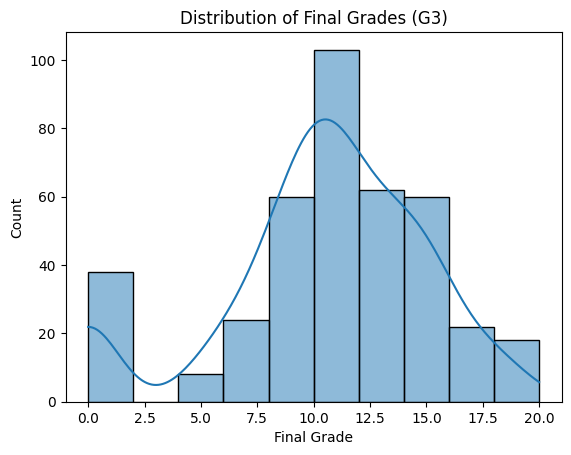

In [28]:
sns.histplot(df['G3'], kde=True, bins=10)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Count')

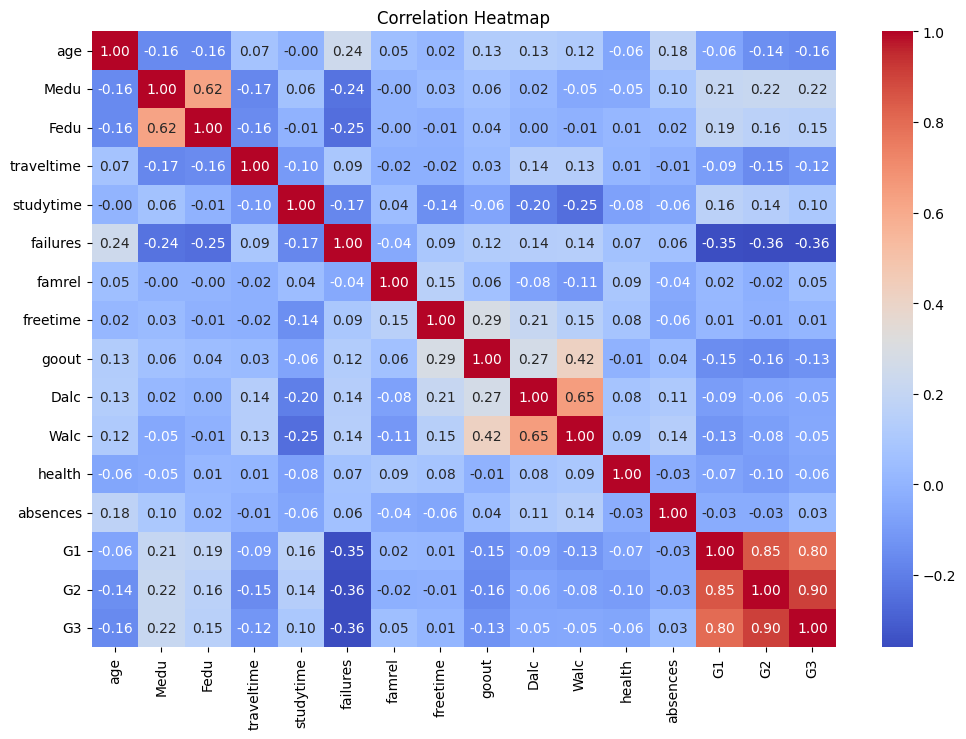

In [32]:
corr=df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

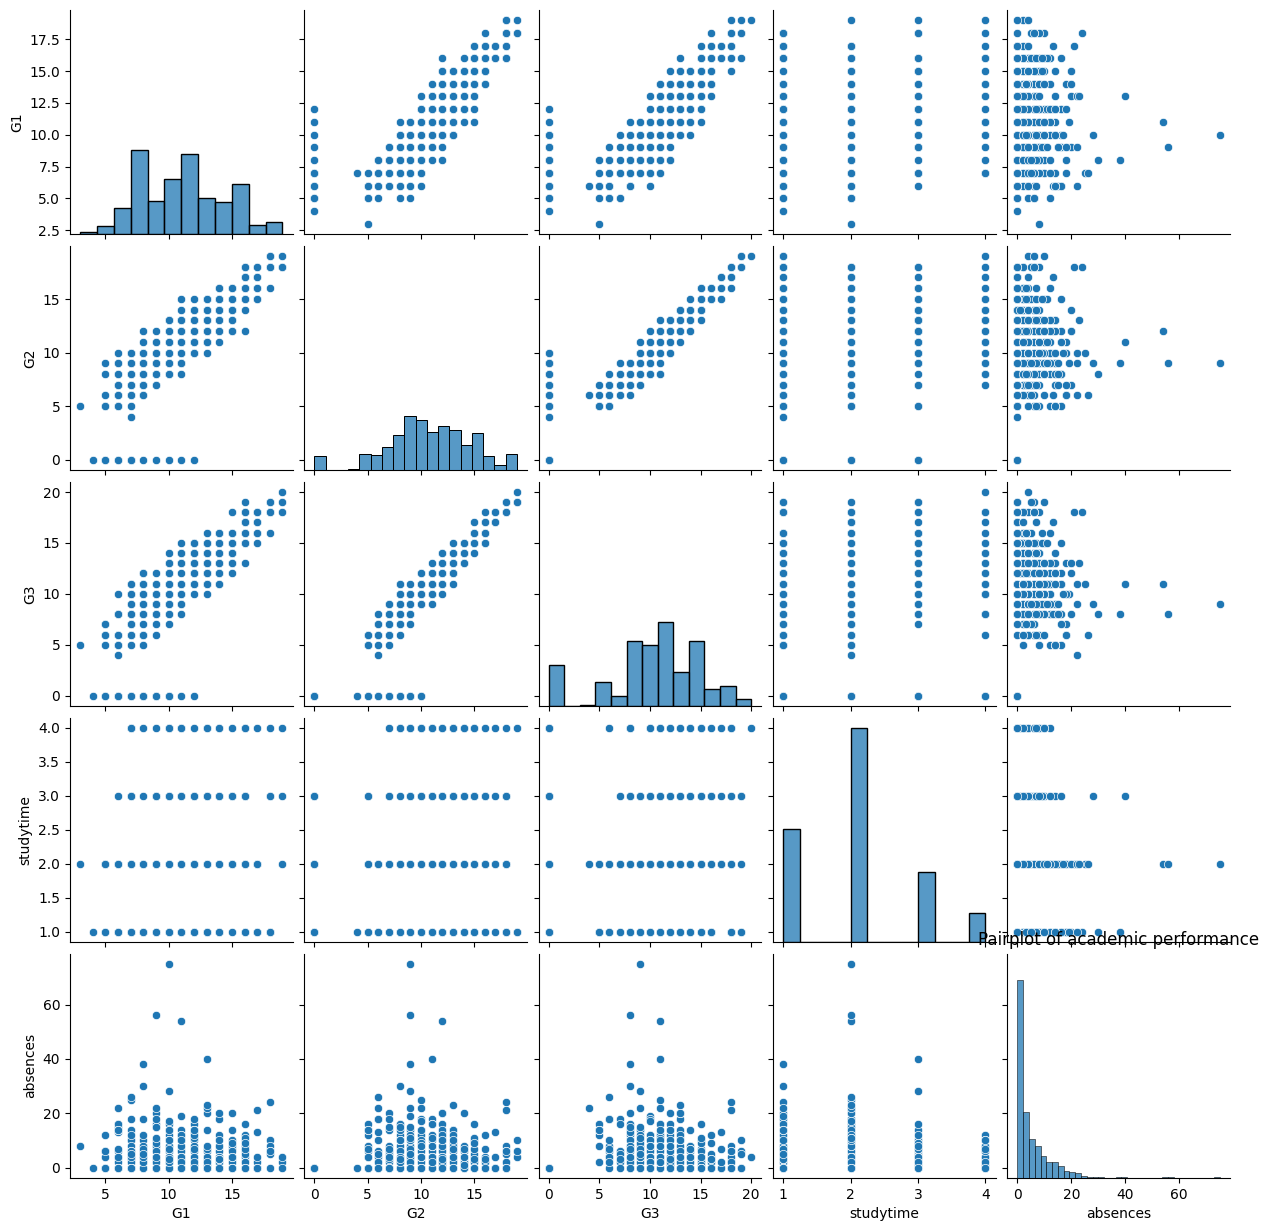

In [35]:
sns.pairplot(df[['G1', 'G2', 'G3', 'studytime', 'absences']])
plt.title('Pairplot of academic performance')
plt.show()

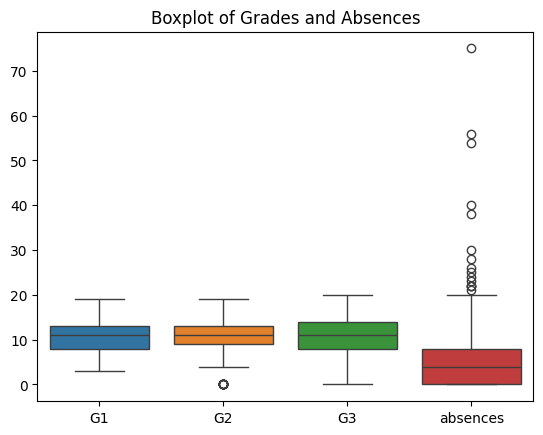

In [36]:
sns.boxplot(data=df[['G1', 'G2', 'G3', 'absences']])
plt.title("Boxplot of Grades and Absences")
plt.show()


In [37]:
corr_target=corr['G3'].sort_values(ascending=False)
print("Correlation with G3:\n", corr_target)

Correlation with G3:
 G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64


In [42]:
sel_features=['G1', 'G2', 'studytime', 'absences', 'failures']
X=df[sel_features]
target='G3'
y=df[target]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler=StandardScaler()

In [45]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [47]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

Ridge()

In [48]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [51]:
models = {'Linear': lr, 'Ridge': ridge, 'Lasso': lasso}
for name, model in models.items():
    y_pred=model.predict(X_test_scaled)

In [ ]:
print(f"{name} Regression:")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"  R² Score: {r2_score(y_test, y_pred):.2f}\n")


Lasso Regression:
  RMSE: 2.10
  R² Score: 0.79



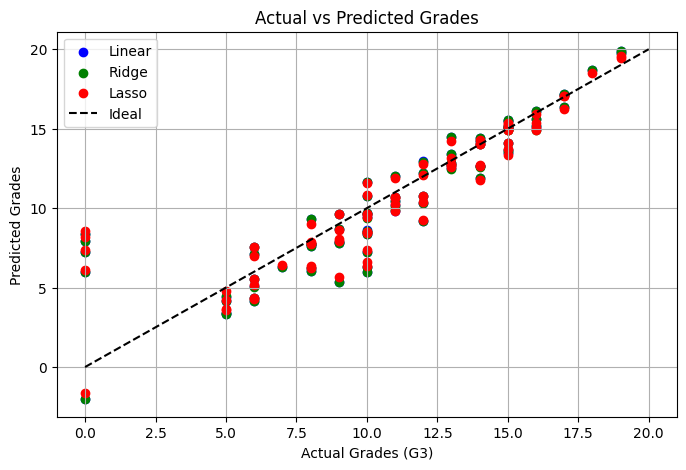

In [58]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, lr.predict(X_test_scaled), color='blue', label='Linear')
plt.scatter(y_test, ridge.predict(X_test_scaled), color='green', label='Ridge')
plt.scatter(y_test, lasso.predict(X_test_scaled), color='red', label='Lasso')
plt.plot([0, 20], [0, 20], 'k--', label='Ideal')
plt.xlabel("Actual Grades (G3)")
plt.ylabel("Predicted Grades")
plt.legend()
plt.title("Actual vs Predicted Grades")
plt.grid(True)
plt.show()



In [59]:
coef_df = pd.DataFrame({
    'Feature': sel_features,
    'Linear': lr.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
})

print(coef_df)


     Feature    Linear     Ridge     Lasso
0         G1  0.463977  0.490099  0.413118
1         G2  3.673540  3.639864  3.632457
2  studytime -0.059473 -0.059592 -0.000000
3   absences  0.329998  0.328854  0.229436
4   failures -0.334759 -0.335948 -0.256145
